<a href="https://colab.research.google.com/github/labudzki/BasicModelsofBiologicalNetworks/blob/main/quasi_steady_state_assumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The quasi steady state assumption

Here we will see how well the quasi steady state assumption holds. We start from the following model for enzyme kinectics, as seen in class:

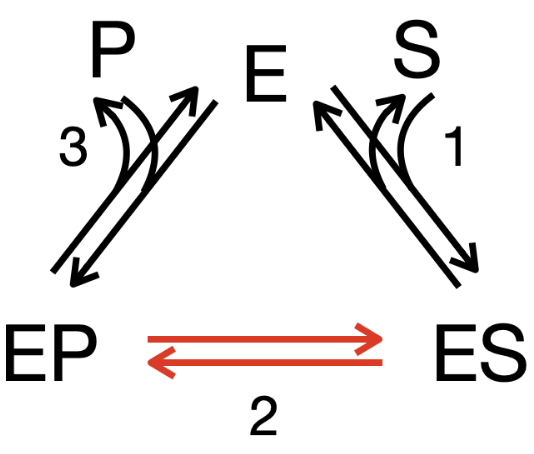


## Exercise
Convince yourself of the following:
1. There are 5 relevant concentrations: $e$, $es$, $ep$, $s$, and $p$.
2. Their concentrations change according to the following ODEs:

$$\begin{align}
\frac{ds}{dt} &= -v_1 \\
\frac{de}{dt} &= -v_1 +v_3\\
\frac{des}{dt} &= v_1 -v_2\\
\frac{dep}{dt} &= v_2 - v_3 \\
\frac{dp}{dt} &= v_3 \\
\end{align}
$$

with the rates

$$\begin{align}
v1 &= k_1^+s\cdot e - k_1^- es\\
v2 &= k_2^+es - k_2^-ep \\
v3 &= k_3^+ep - k_3^-e \cdot p
\end{align}
$$

3. Solve these ODEs using the followint parameters $k_1^+ = k_2^+ = k_3^+ = 10$, and $k_1^- = k_2^- = k_3^- = 1$. And with the initial concentrations $es_0 = ep_0 = p_0 = 0$, $s_0 = 20$, and $e_0 = 2$. Use the timespan $[0,5]$. Note: it might be useful to use a log scale for time.
4. Is $s$ in excess? Do you see a region where the quasi steady state assumption holds?
5. Now repeat the above, but changing $s_0 = 1000$, and the timespan $[0,1000]$, and answer question 4 again.


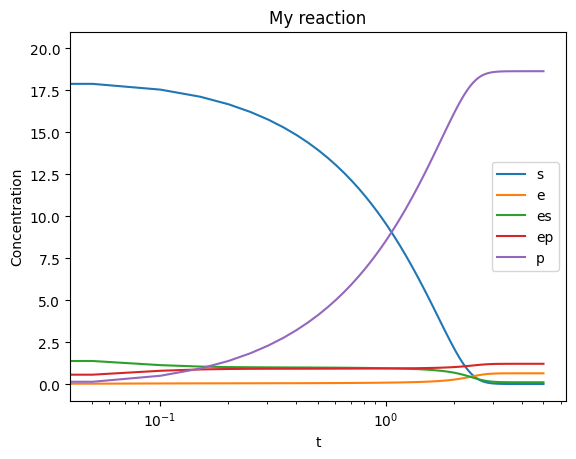

In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def my_system(t, x):
  s, e, es, ep, p = x
  k1p = k2p = k3p = 10
  k1n = k2n = k3n = 1

  v1 = k1p*s*e - k1n*es
  v2 = k2p*es - k2n*ep
  v3 = k3p*ep - k3n*e*p

  dsdt = -v1
  dedt = -v1 + v3
  desdt = v1 - v2
  depdt = v2 - v3
  dpdt = v3

  return [dsdt, dedt, desdt, depdt, dpdt]

s0 = 20
e0 = 2
es0 = ep0 = p0 = 0

x0 = [s0, e0, es0, ep0, p0]

ti = 0
tf = 5
t_span = [ti, tf]
t_eval = np.linspace(ti, tf, 100)

sol = sp.integrate.solve_ivp(my_system, t_span, x0, t_eval=t_eval)

t = sol.t
y0 = sol.y[0]
y1 = sol.y[1]
y2 = sol.y[2]
y3 = sol.y[3]
y4 = sol.y[4]

plt.figure()
plt.plot(t, y0, label = 's')
plt.plot(t, y1, label = 'e')
plt.plot(t, y2, label = 'es')
plt.plot(t, y3, label = 'ep')
plt.plot(t, y4, label = 'p')
plt.xscale('log')
plt.xlabel('t')
plt.ylabel('Concentration')
plt.title('My reaction')
plt.legend()
plt.show()
